# Articles
- [How a Kalman filter works, in pictures](https://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/)
- [Kalman Filters: A step by step implementation guide in python](https://towardsdatascience.com/kalman-filters-a-step-by-step-implementation-guide-in-python-91e7e123b968)
- [Time Series Analysis & Climate Change](https://towardsdatascience.com/time-series-analysis-and-climate-change-7bb4371021e)
- [Analysis of Time Series Data on Wind Turbine Loads](http://www.ce.utexas.edu/prof/manuel/papers/trexreport_aaronsterns.pdf)

[Data Descriptions](https://opendata-renewables.engie.com/explore/dataset/39490fd2-04a2-4622-9042-ce4dd34c2a58/information)

# Pickle and unpickle windfarm df

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import string
import datetime
import warnings
from datetime import datetime
from math import *

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

%matplotlib inline

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import statsmodels.api as sm

In [2]:
windfarm2016 = pd.read_pickle("./windfarm2016.pkl")
windfarm2016

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.040001,16.000000,17.00,0.15,4.21000,4.130000,4.28000,0.030000,25.370001,24.980000,25.680000,0.120000,-0.150000,-0.440000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.440000,0.080000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,133.670000,123.090000,143.130000,5.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.510000,9.00,8.8,9.05,0.02,50.000000,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.000000,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,133.670000,NaN,NaN,NaN,133.670000,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.000000,16.000000,16.00,0.00,4.07000,4.030000,4.10000,0.010000,24.190001,23.980000,24.360001,0.060000,-0.130000,-0.430000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.430000,0.070000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,150.060000,123.090000,205.460010,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.150000,8.66,8.5,8.75,0.07,50.020000,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.000000,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,150.060000,NaN,NaN,NaN,150.060000,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.000000,45.000000,45.000000,0.00,9.000000,9.000000,9.94,0.05,94.43000,73.129997,107.93000,8.530000,28.719999,28.450001,28.969999,0.080000,-1.310000,-1.780000,-0.930000,0.140000,0.000000,0.000000,0.090000,0.000000,1.310000,0.930000,1.780000,0.140000,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,2

In [3]:
windfarm = pd.read_pickle("./windfarm.pkl")
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,2017-02-08,07:00:00,2017,2,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,38.369999,17.6800,52.41000,9.390000,2.39,2.06,2.69,0.09,-1.89000,-2.36000,-1.40000,0.150000,0.000000,0.000000,0.000000,0.00,1.89000,1.40000,2.36000,0.15,1.00,1.0,1.00,0.0,38.110001,17.27,51.919998,9.400000,33.410000,33.200001,33.599998,0.14,30.790001,30.600000,30.850000,0.03,45.590000,45.299999,45.799999,0.11,35.360001,35.099998,35.599998,0.15,37.939999,37.799999,38.000000,0.08,34.130001,31.799999,35.700001,1.04,39.580002,39.049999,40.200001,0.40,318.12000,318.12000,318.12000,0.00,20.610001,20.500000,20.799999,0.08,0.14,0.00,1.94,0.44,0.22,0.00,1.93,0.53,0.18,0.00,1.89,0.44,358.049990,298.76999,54.560001,12.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.939999,-19.350000,96.449997,12.05,4.80,4.8,4.90,0.01,50.000000,49.959999,50.029999,0.01,698.40002,696.01001,708.03003,2.40,0.33,0.00,0.49,0.16,19.020000,19.0,19.100000,0.04,-18.889999,-438.32999,0.00000,79.82000,NaN,NaN,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,2017-01-26,01:40:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1204.140000,1195.8101,1208.66000,3.260000,1796.71,1764.35,1816.86,10.58,197.32001,186.07001,200.96001,2.150000,22.200001,16.120001,25.110001,1.04,198.58000,186.92999,202.14999,2.17,0.99,1.0,0.99,0.0,1205.520000,1197.17,1210.060100,3.250000,40.639999,40.200001,41.099998,0.17,29.379999,29.150000,29.600000,0.08,54.580002,53.500000,55.799999,0.37,64.800003,64.550003,65.000000,0.08,64.400002,64.300003,64.599998,0.08,54.959999,54.700001,55.599998,0.12,56.209999,56.000000,56.450001,0.07,63.48000,63.48000,63.48000,0.00,21.900000,21.700001,22.200001,0.13,4.33,3.42,5.54,0.39,5.38,3.74,6.69,0.46,4.85,3.67,6.01,0.39,74.470001,9.47000,108.520000,9.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,-54.009998,45.029999,9.74,-7.16,-7.3,-6.90,0.11,50.009998,49.980000,50.029999,0.01,704.65997,703.42999,705.90002,0.45,11.48,11.37,11.54,0.03,21.610001,21.6,21.799999,0.03,1562.970000,1481.31010,1586.53000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,2017-01-26,12:50:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1179.860000,1060.6200,1287.86000,49.009998,1662.15,1251.04,2029.50,164.30,176.45000,108.74000,245.96001,29.559999,18.620001,11.780000,24.469999,2.48,177.53000,110.14000,246.80000,29.35,0.99,1.0,0.98,0.0,1181.700000,1062.28,1289.950000,49.110001,49.509998,48.849998,50.099998,0.21,37.349998,37.000000,37.700001,0.13,63.990002,62.599998,65.500000,0.56,66.800003,66.099998,67.349998,0.27,66.290001,65.750000,66.900002,0.34,56.830002,56.450001,57.150002,0.11,58.570000,58.299999,59.049999,0.09,70.07000,70.07000,70.07000,0.00,27.410000,27.299999,27.700001,0.11,4.89,3.64,6.39,0.52,5.19,3.65,6.69,0.52,5.04,3.70,6.38,0.48,73.949997,328.78000,122.340000,13.83,NaN,NaN,NaN,NaN

In [4]:
# Append 2 dfs
windfarm = windfarm2016.append(windfarm)

In [5]:
windfarm['Date_time'] = pd.to_datetime(windfarm.Date_time, utc=True)

In [6]:
# Sort dates in chronological order 
# The order of data here is important and should be *chronological*
# as we are going to forecast the next points
windfarm = windfarm.sort_values(by='Dates')

In [7]:
# convert to Week_Number
windfarm['Week_Number'] = windfarm['Date_time'].dt.week

In [8]:
windfarm = windfarm.reset_index()

In [9]:
windfarm = windfarm.drop(columns='index')
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,Week_Number
0,R80736,2016-01-01 08:50:00+00:00,2016-01-01,08:50:00,2016,1,45.00,45.00,45.00,0.00,13.00,13.0,13.66,0.03,77.800003,57.50000,90.449997,7.890000,25.1500,24.900000,25.389999,0.07000,-0.910000,-1.33000,-0.590000,0.11,0.000000,-0.600000,0.060000,0.03,0.910000,0.590000,1.45000,0.120000,1.00,1.0,1.00,0.00,74.220001,54.02000,86.599998,7.900000,29.230000,29.200001,29.299999,0.03,28.379999,28.200001,28.500000,0.11,48.480000,48.099998,48.900002,0.23,41.880001,41.700001,41.900002,0.04,42.410000,42.250000,42.500000,0.09,44.099998,43.799999,44.450001,0.09,45.619999,45.400002,45.799999,0.07,131.950000,131.950000,131.950000,0.0,19.799999,19.500000,20.0,0.12,1.39,0.00,2.31,0.70,1.80,0.00,2.47,0.49,1.60,0.00,2.38,0.56,123.570000,28.740000,224.32001,17.629999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.45,-103.210000,92.370003,17.629999,5.54,5.40,5.6,0.09,49.990002,49.970001,50.000000,0.01,698.78003,698.26001,699.33002,0.20,0.70,0.51,0.820000,0.08,19.900000,19.799999,20.000000,0.09,-118.81000,-191.0500,-68.860001,20.690001,NaN,NaN,NaN,NaN,123.570000,NaN,NaN,NaN,123.570000,NaN,NaN,NaN,53
1,R80736,2016-01-01 15:30:00+00:00,2016-01-01,15:30:00,2016,1,-0.99,-0.99,-0.99,0.00,15.00,15.0,15.00,0.00,1420.480000,1340.46000,1487.310100,34.400002,2403.3501,2074.530000,2690.230000,127.12000,336.000000,267.38000,399.329990,29.34,19.830000,8.440000,26.200001,2.56,336.630000,267.980010,399.92001,29.360001,1.00,1.0,0.99,0.00,1417.350000,1337.31990,1484.220000,34.400002,47.189999,46.400002,47.799999,0.23,37.830002,37.400002,38.200001,0.14,63.060001,61.500000,64.800003,0.51,64.410004,63.799999,64.900002,0.24,66.489998,65.800003,66.900002,0.28,53.799999,53.099998,54.299999,0.26,54.700001,54.099998,55.250000,0.23,62.810001,62.810001,62.810001,0.0,28.959999,28.600000,29.1,0.11,5.88,4.17,7.73,0.62,6.05,4.68,7.60,0.60,5.97,4.47,7.45,0.57,69.099998,30.860001,145.87000,10.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.32,-31.950001,83.059998,10.790000,6.19,6.10,6.2,0.02,49.990002,49.980000,50.009998,0.01,698.09003,697.20001,698.78998,0.32,13.51,12.74,14.150000,0.33,23.209999,23.000000,23.299999,0.06,2260.38990,1902.6000,2576.149900,145.259990,NaN,NaN,NaN,NaN,69.099998,NaN,NaN,NaN,69.099998,NaN,NaN,NaN,53
2,R80790,2016-01-01 11:30:00+00:00,2016-01-01,11:30:00,2016,1,-0.37,-1.00,0.49,0.45,14.00,14.0,14.00,0.00,965.500000,956.64001,984.400020,4.960000,607.8100,76.540001,1073.340000,242.10001,34.869999,-14.97000,82.400002,24.41,68.209999,40.029999,80.290001,8.70,80.110001,43.549999,100.50000,11.160000,0.45,1.0,0.03,0.27,971.210020,962.39001,990.039980,4.980000,31.100000,30.600000,31.500000,0.16,27.740000,27.600000,28.000000,0.09,44.029999,42.299999,45.950001,0.68,49.759998,47.200001,51.400002,1.21,46.209999,43.900002,47.900002,1.21,44.290001,43.250000,45.000000,0.37,45.610001,45.099998,46.000000,0.22,107.560000,107.560000,107.560000,0.0,21.719999,21.500000,21.9,0.10,4.10,2.68,5.30,0.46,4.10,2.79,5

# Break up windfarm df into 4 dfs based on turbine

In [10]:
windfarm.Wind_turbine_name.value_counts()

R80736    107131
R80711    107131
R80721    107131
R80790    106987
Name: Wind_turbine_name, dtype: int64

In [11]:
wf_R80721 = windfarm[windfarm['Wind_turbine_name']== 'R80721']
wf_R80721

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,Week_Number
5,R80721,2016-01-01 05:30:00+00:00,2016-01-01,05:30:00,2016,1,-1.000000,-1.000000,-1.000000,0.00,17.00,17.0,17.0,0.00,1030.890000,997.520020,1060.270000,16.410000,1179.7300,1062.87000,1290.4301,50.450001,97.190002,81.489998,112.15,7.350000,15.59,10.94,19.790001,1.51,98.480003,82.519997,113.19000,7.290000,0.99,0.99,0.97,0.00,1032.83,999.460020,1062.290000,16.440001,45.330002,44.500000,46.000000,0.29,37.849998,37.400002,38.299999,0.15,62.599998,61.349998,64.099998,0.51,62.970001,62.599998,63.200001,0.12,61.310001,61.000000,61.650002,0.19,55.970001,55.750000,56.549999,0.10,56.570000,56.400002,56.750000,0.09,187.50,187.50,187.50,0.00,28.370001,28.000000,28.900000,0.26,4.61,3.63,5.95,0.41,4.85,3.59,6.13,0.41,4.73,3.74,5.91,0.38,194.870000,149.300000,241.02,12.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.36,-38.200001,53.520000,12.42,6.29,6.10,6.4,0.11,49.990002,49.970001,50.009998,0.01,700.28998,699.84998,700.69000,0.16,9.83,9.520001,10.12,0.16,25.120001,25.100000,25.299999,0.05,897.78998,778.44000,1009.53000,53.990002,NaN,NaN,NaN,NaN,194.870000,NaN,NaN,NaN,194.870000,NaN,NaN,NaN,53
6,R80721,2016-01-01 04:10:00+00:00,2016-01-01,04:10:00,2016,1,-1.000000,-1.000000,-1.000000,0.00,17.00,17.0,17.0,0.00,1106.730000,1053.630000,1141.470000,18.340000,1412.5400,1259.64000,1527.6100,56.450001,133.340000,108.780000,152.66,9.080000,16.09,8.54,20.549999,1.75,134.410000,109.780000,153.60001,9.060000,0.99,1.00,0.99,0.00,1108.86,1055.630000,1143.640000,18.379999,36.990002,36.099998,37.900002,0.42,32.549999,32.000000,33.099998,0.22,53.720001,52.500000,54.900002,0.39,62.799999,62.200001,63.400002,0.34,61.619999,60.700001,62.400002,0.52,55.529999,55.150002,55.950001,0.10,56.560001,56.299999,56.750000,0.09,187.50,187.50,187.50,0.00,24.250000,23.500000,24.799999,0.36,4.66,3.71,6.25,0.44,5.02,3.86,6.41,0.43,4.84,3.82,6.17,0.41,186.640000,146.490010,252.52,11.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.86,-41.020000,65.019997,11.50,6.17,6.10,6.2,0.04,49.980000,49.959999,50.000000,0.01,701.53998,701.13000,702.00000,0.18,10.56,10.040000,10.90,0.18,25.139999,25.100000,25.299999,0.06,1147.34000,984.17999,1277.52000,60.259998,NaN,NaN,NaN,NaN,186.640000,NaN,NaN,NaN,186.640000,NaN,NaN,NaN,53
24,R80721,2016-01-01 10:20:00+00:00,2016-01-01,10:20:00,2016,1,44.990002,44.990002,44.990002,0.00,15.06,15.0,16.0,0.22,62.669998,48.970001,77.080002,7.270000,2.2700,2.04000,2.5500,0.090000,-1.990000,-3.670000,-1.18,0.490000,0.00,0.00,0.700000,0.03,1.990000,1.180000,4.10000,0.490000,1.00,1.00,1.00,0.00,62.59,49.040001,76.849998,7.260000,32.230000,32.099998,32.299999,0.09,28.500000,28.400000,28.700001,0.10,45.099998,44.900002,45.299999,0.13,49.459999,48.700001,50.400002,0.45,47.910000,47.500000,48.700001,0.32,44.930000,42.200001,46.500000,1.24,47.990002,47.750000,48.299999,0.18,151.28,151.28,151.28,0.00,22.000000,21.799999,22.250000,0.11,2.10,0.00,3.07,0.47,2.63,1.47,3.80,0.48,2.36,1.04,3.40,0.47,12

In [12]:
wf_R80711 = windfarm[windfarm['Wind_turbine_name']== 'R80711']
wf_R80711

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,Week_Number
3,R80711,2016-01-01 14:30:00+00:00,2016-01-01,14:30:00,2016,1,-0.99,-0.99,-0.99,0.00,14.0,14.0,14.0,0.0,1639.86,1540.4100,1748.8199,52.639999,3261.2200,2758.8501,3785.7800,240.39000,549.40002,429.79001,684.89001,61.020000,-1.10,-7.23,3.98,2.31,549.40997,429.85001,684.90997,61.009998,1.00,-1.00,1.00,0.00,1638.86,1539.33,1747.8101,52.650002,35.950001,35.150002,36.900002,0.40,33.590000,33.000000,34.299999,0.31,53.639999,52.349998,54.799999,0.37,67.430000,66.400002,68.599998,0.57,70.250000,69.400002,71.300003,0.56,55.560001,54.849998,56.200001,0.31,56.959999,56.349998,57.599998,0.31,76.830002,76.830002,76.830002,0.0,20.290001,18.200001,21.900000,1.01,6.72,4.63,9.30,0.78,6.67,4.70,8.68,0.74,6.70,4.98,8.86,0.71,79.839996,12.800000,177.23000,12.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,-64.029999,100.400000,12.08,5.93,5.80,6.1,0.08,49.990002,49.980000,50.000000,0.01,701.82001,701.21002,702.71002,0.26,15.63,14.66,16.700001,0.51,23.360001,23.299999,23.400000,0.05,3193.4600,2661.4600,3750.5601,254.98000,NaN,NaN,NaN,NaN,79.839996,NaN,NaN,NaN,79.839996,NaN,NaN,NaN,53
4,R80711,2016-01-01 18:00:00+00:00,2016-01-01,18:00:00,2016,1,-0.99,-0.99,-0.99,0.00,14.0,14.0,14.0,0.0,1471.34,1419.7500,1524.1200,32.880001,2617.4900,2423.0801,2836.0601,120.58000,380.50000,335.12000,431.17999,29.160000,-2.46,-8.57,0.70,1.32,380.53000,335.14999,431.22000,29.160000,1.00,-1.00,1.00,0.00,1470.30,1418.64,1523.1400,32.900002,39.500000,37.250000,42.049999,1.21,35.279999,33.900002,36.799999,0.78,57.700001,54.750000,61.500000,1.37,61.340000,60.000000,62.750000,0.69,67.559998,66.250000,68.750000,0.69,48.160000,47.250000,49.250000,0.42,55.810001,54.799999,56.849998,0.47,106.460000,106.460000,106.460000,0.0,13.810000,13.000000,14.600000,0.45,6.39,5.19,7.83,0.48,6.41,4.97,8.31,0.52,6.40,5.22,8.06,0.45,109.950000,76.900002,140.11000,9.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.51,-29.559999,33.650002,9.74,5.32,5.20,5.5,0.10,49.990002,49.970001,50.009998,0.01,695.70001,694.45001,696.60999,0.43,14.02,13.51,14.530000,0.31,24.000000,23.900000,24.200001,0.08,2468.2600,2255.3799,2704.5100,134.23000,NaN,NaN,NaN,NaN,109.950000,NaN,NaN,NaN,109.950000,NaN,NaN,NaN,53
7,R80711,2016-01-01 18:10:00+00:00,2016-01-01,18:10:00,2016,1,-0.99,-0.99,-0.99,0.00,14.0,14.0,14.0,0.0,1499.54,1412.0601,1605.3900,59.259998,2720.3799,2392.8999,3154.8799,222.95000,409.54999,328.45001,517.73999,55.020000,-2.76,-12.77,3.31,2.83,409.59000,328.45999,517.78003,55.029999,1.00,-1.00,1.00,0.00,1498.50,1410.88,1604.4301,59.310001,36.360001,35.700001,37.700001,0.44,33.430000,33.099998,34.099998,0.20,53.889999,52.250000,56.250000,0.73,63.230000,60.099998,65.699997,1.61,67.260002,66.099998,69.099998,0.94,54.529999,48.200001,56.099998,1.31,56.270000,54.900002,57.400002,0.70,106.460000,106.460000,106.460000,0.0,17.059999,12.900000,20.200001,2.38,6.48,4.69,8.44,0.60,6.58,5.27,8.21,0.52,6.53,5.08,8.24,0.53,116.300000,93.019997,142.12

In [13]:
wf_R80736 = windfarm[windfarm['Wind_turbine_name']== 'R80736']
wf_R80736

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,Week_Number
0,R80736,2016-01-01 08:50:00+00:00,2016-01-01,08:50:00,2016,1,45.00,45.00,45.00,0.00,13.00,13.0,13.66,0.03,77.800003,57.500000,90.449997,7.890000,25.1500,24.900000,25.389999,0.07000,-0.91,-1.33,-0.59000,0.110000,0.00,-0.60,0.060000,0.03,0.91000,0.59000,1.45000,0.120000,1.00,1.00,1.00,0.00,74.220001,54.020000,86.599998,7.900000,29.230000,29.200001,29.299999,0.03,28.379999,28.200001,28.500000,0.11,48.480000,48.099998,48.900002,0.23,41.880001,41.700001,41.900002,0.04,42.410000,42.250000,42.500000,0.09,44.099998,43.799999,44.450001,0.09,45.619999,45.400002,45.799999,0.07,131.950000,131.950000,131.950000,0.00,19.799999,19.500000,20.000000,0.12,1.39,0.00,2.31,0.70,1.80,0.00,2.47,0.49,1.60,0.00,2.38,0.56,123.570000,28.740000,224.32001,17.629999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.45,-103.210000,92.370003,17.629999,5.54,5.40,5.6,0.09,49.990002,49.970001,50.000000,0.01,698.78003,698.26001,699.33002,0.20,0.70,0.51,0.82,0.08,19.900000,19.799999,20.000000,0.09,-118.810000,-191.05000,-68.860001,20.690001,NaN,NaN,NaN,NaN,123.570000,NaN,NaN,NaN,123.570000,NaN,NaN,NaN,53
1,R80736,2016-01-01 15:30:00+00:00,2016-01-01,15:30:00,2016,1,-0.99,-0.99,-0.99,0.00,15.00,15.0,15.00,0.00,1420.480000,1340.460000,1487.310100,34.400002,2403.3501,2074.530000,2690.230000,127.12000,336.00,267.38,399.32999,29.340000,19.83,8.44,26.200001,2.56,336.63000,267.98001,399.92001,29.360001,1.00,1.00,0.99,0.00,1417.350000,1337.319900,1484.220000,34.400002,47.189999,46.400002,47.799999,0.23,37.830002,37.400002,38.200001,0.14,63.060001,61.500000,64.800003,0.51,64.410004,63.799999,64.900002,0.24,66.489998,65.800003,66.900002,0.28,53.799999,53.099998,54.299999,0.26,54.700001,54.099998,55.250000,0.23,62.810001,62.810001,62.810001,0.00,28.959999,28.600000,29.100000,0.11,5.88,4.17,7.73,0.62,6.05,4.68,7.60,0.60,5.97,4.47,7.45,0.57,69.099998,30.860001,145.87000,10.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.32,-31.950001,83.059998,10.790000,6.19,6.10,6.2,0.02,49.990002,49.980000,50.009998,0.01,698.09003,697.20001,698.78998,0.32,13.51,12.74,14.15,0.33,23.209999,23.000000,23.299999,0.06,2260.389900,1902.60000,2576.149900,145.259990,NaN,NaN,NaN,NaN,69.099998,NaN,NaN,NaN,69.099998,NaN,NaN,NaN,53
8,R80736,2016-01-01 10:30:00+00:00,2016-01-01,10:30:00,2016,1,45.00,45.00,45.00,0.00,13.66,13.0,14.00,0.40,71.320000,48.959999,106.190000,12.730000,23.8500,23.530001,24.160000,0.11000,-0.49,-1.26,-0.01000,0.380000,0.00,-0.03,0.000000,0.00,0.49000,0.01000,1.26000,0.380000,1.00,1.00,1.00,0.00,67.889999,45.459999,102.500000,12.720000,31.660000,31.600000,31.799999,0.09,27.570000,27.400000,27.799999,0.06,44.349998,44.000000,44.599998,0.12,44.439999,43.849998,45.000000,0.30,44.299999,44.000000,44.700001,0.18,42.189999,40.000000,43.549999,1.08,44.650002,44.400002,44.900002,0.13,131.950000,131.950000,131.950000,0.00,22.160000,22.000000,22.299999,0.11,0.60,0.00,3.81,0.94,1.29,0.00,3.66,0.90,0.95,0.00,3.73,0.82,136.1

In [14]:
wf_R80790 = windfarm[windfarm['Wind_turbine_name']== 'R80790']
wf_R80790

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,Week_Number
2,R80790,2016-01-01 11:30:00+00:00,2016-01-01,11:30:00,2016,1,-0.370000,-1.000000,0.490000,0.45,14.00,14.0,14.0,0.00,965.500000,956.640010,984.400020,4.960000,607.8100,76.540001,1073.3400,242.10001,34.869999,-14.970000,82.400002,24.410000,68.209999,40.029999,80.290001,8.70,80.110001,43.549999,100.50000,11.160000,0.45,1.0,0.03,0.27,971.210020,962.390010,990.03998,4.980000,31.100000,30.600000,31.500000,0.16,27.740000,27.600000,28.000000,0.09,44.029999,42.299999,45.950001,0.68,49.759998,47.200001,51.400002,1.21,46.209999,43.900002,47.900002,1.21,44.290001,43.250000,45.000000,0.37,45.610001,45.099998,46.000000,0.22,107.56,107.56,107.56,0.0,21.719999,21.500000,21.900000,0.10,4.10,2.68,5.30,0.46,4.10,2.79,5.220000,0.41,4.10,2.75,5.23,0.42,95.949997,50.230000,179.72000,13.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.62,-57.330002,72.160004,13.92,6.90,6.70,7.00,0.06,50.009998,49.990002,50.029999,0.01,701.65002,700.03003,702.87000,0.59,9.24,9.15,9.440000,0.05,21.719999,21.450001,22.000000,0.16,342.17001,-147.88000,795.9400,238.42999,NaN,NaN,NaN,NaN,95.949997,NaN,NaN,NaN,95.949997,NaN,NaN,NaN,53
11,R80790,2016-01-01 02:30:00+00:00,2016-01-01,02:30:00,2016,1,-1.000000,-1.000000,-1.000000,0.00,15.12,15.0,16.0,0.30,1089.850000,1006.690000,1146.610000,40.139999,1377.0000,1129.530000,1587.6100,115.72000,127.580000,88.010002,158.140000,19.580000,16.020000,7.240000,20.500000,1.80,128.660000,89.510002,159.14999,19.549999,0.99,1.0,0.98,0.00,1096.130000,1012.610000,1152.89000,40.290001,34.970001,33.299999,36.799999,0.96,32.349998,31.049999,33.799999,0.74,56.119999,53.150002,59.150002,1.27,63.730000,63.599998,63.950001,0.07,63.450001,63.099998,64.000000,0.26,56.580002,56.049999,57.200001,0.18,58.330002,58.099998,58.599998,0.06,203.05,203.05,203.05,0.0,13.760000,13.100000,15.900000,0.58,4.58,3.50,5.69,0.39,4.72,3.69,6.080000,0.40,4.65,3.65,5.76,0.36,201.429990,93.500000,258.64001,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.61,-109.550000,55.599998,13.46,5.99,5.90,6.00,0.02,49.990002,49.970001,50.000000,0.01,699.78998,698.71002,700.90002,0.51,10.43,9.64,10.980000,0.39,28.940001,28.799999,29.049999,0.08,1106.66000,830.27002,1311.6899,131.12000,NaN,NaN,NaN,NaN,201.429990,NaN,NaN,NaN,201.429990,NaN,NaN,NaN,53
12,R80790,2016-01-01 20:30:00+00:00,2016-01-01,20:30:00,2016,1,-1.000000,-1.000000,-1.000000,0.00,14.00,14.0,14.0,0.00,1474.880000,1306.800000,1673.380000,98.120003,2631.3101,1969.720000,3520.9700,384.17999,398.190000,251.130000,611.469970,92.760002,25.559999,19.230000,32.320000,2.50,399.079990,252.320010,612.03998,92.589996,1.00,1.0,0.99,0.00,1482.380000,1313.700000,1681.55000,98.459999,35.500000,34.299999,36.700001,0.56,31.250000,30.500000,31.950001,0.34,53.419998,51.549999,55.900002,0.71,67.900002,66.599998,68.500000,0.41,68.339996,67.199997,69.099998,0.43,56.500000,55.650002,57.049999,0.31,58.169998,57.799999,58.400002,0.15,118.54,118.54,118.54,0.0,21.650000,19.7

# Holt Method & ExponentialSmoothing
- [Holt Winters](https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html)
- [How to Build Exponential Smoothing Models Using Python: Simple Exponential Smoothing, Holt, and Holt-Winters](https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1)
- [Stack Overflow](https://stackoverflow.com/questions/50785479/holt-winters-time-series-forecasting-with-statsmodels)
- [statsmodels.tsa.holtwinters.ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html)

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [16]:
# Convert negative P_avg and null values to 1
windfarm.loc[(windfarm['P_avg'] < 0) | (windfarm['P_avg'].isnull()), 'P_avg'] = 1

In [17]:
# Groupby year/week
windfarm_yw_P = windfarm.groupby(['year','Week_Number']).mean().reset_index().P_avg

In [18]:
len(windfarm_yw_P)

107

In [19]:
# # first 80% 
# windfarm_yw_P[:86]

In [20]:
# # last 20%
# windfarm_yw_P[-21:]

In [21]:
# Hold out 20% of the end data for testing
Ptrain, Ptest = windfarm_yw_P[:86], windfarm_yw_P[-21:]

## Fit Types:
1. This fit uses an additive trend, additive seasonal of period season_length=7 and a Box-Cox transformation.

## [statsmodels.tsa.holtwinters.ExponentialSmoothing Parameters](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html)

- seasonal_periods - int, optional: The number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily data with a weekly cycle.

- trend - {“add”, “mul”, “additive”, “multiplicative”, None}, optional: Type of trend component.

- seasonal- {“add”, “mul”, “additive”, “multiplicative”, None}, optional: Type of seasonal component.

- damped - bool, optional: Should the trend component be damped.

In [22]:
P_fit_es = ExponentialSmoothing(Ptrain, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
P_pred_es = P_fit_es.predict(start=Ptest.index[0], end=Ptest.index[-1])

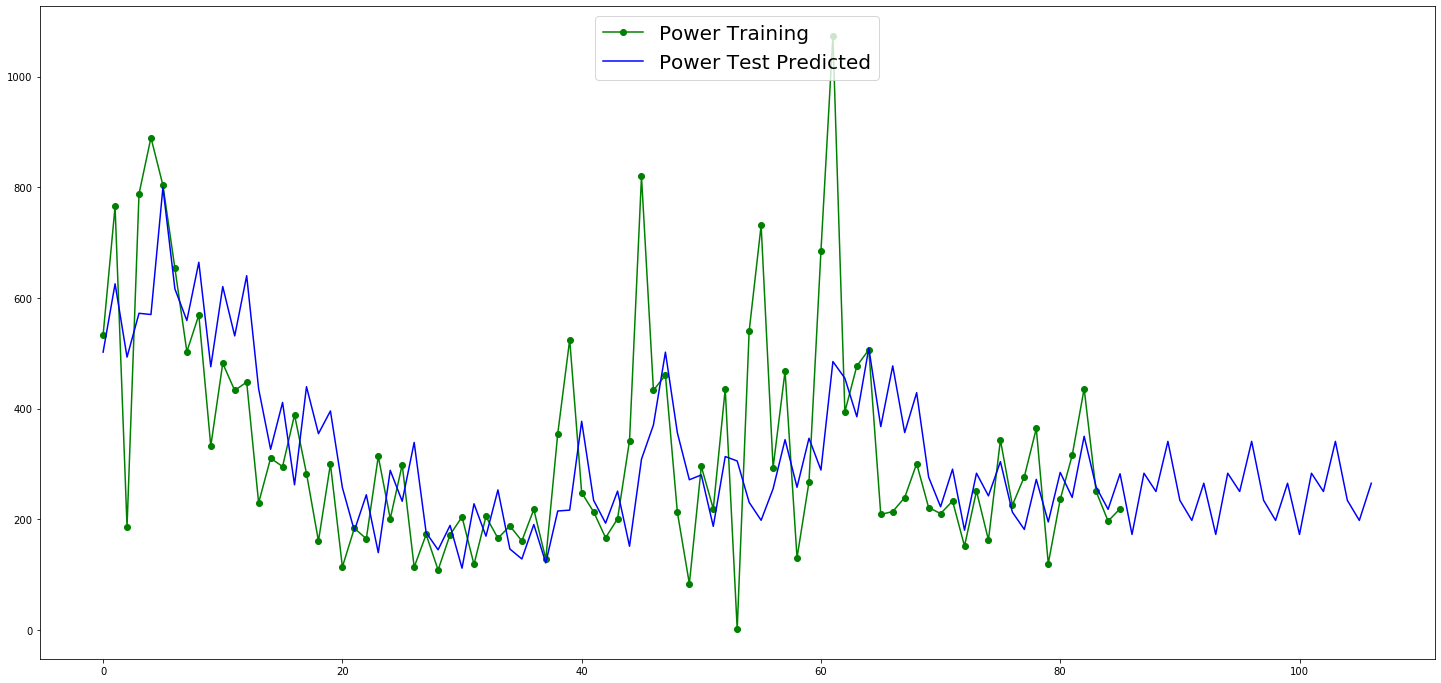

In [23]:
plt.figure(figsize=(25,12))

plt.plot(Ptrain.index, Ptrain, label='Power Training', color="green", marker="o")
# plt.plot(pred_es.index, pred_es, label='Test', color='blue')
plt.plot(pd.concat([P_fit_es.fittedvalues, P_pred_es]), label='Power Test Predicted', color='blue') # Blue is predicted

# plt.plot(pred_es.index, pred_es, label='Holt-Winters', color='red')
plt.legend(loc=9, prop={'size': 20})
plt.show();

In [24]:
P_fit_es = ExponentialSmoothing(Ptrain, seasonal_periods=7, trend='add', seasonal='mul').fit(use_boxcox=True)
P_pred_es = P_fit_es.predict(start=Ptest.index[0], end=Ptest.index[-1])

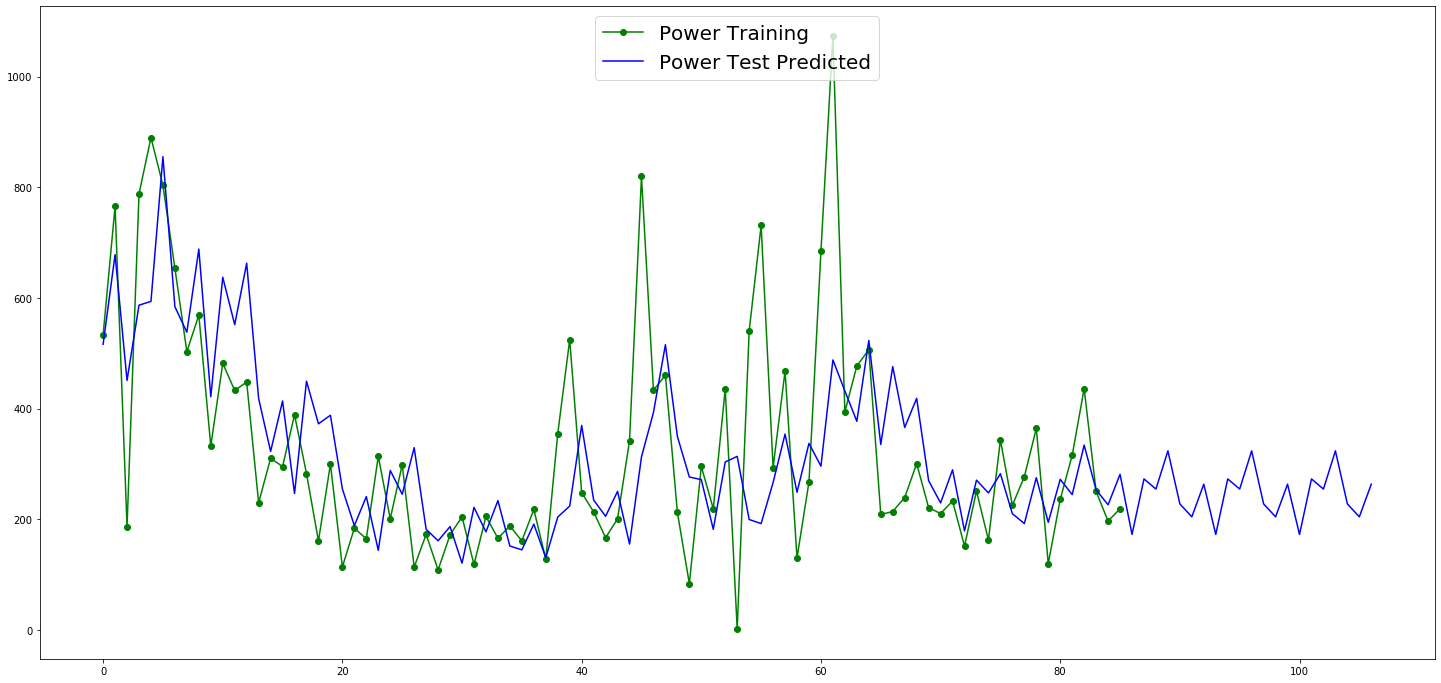

In [25]:
plt.figure(figsize=(25,12))

plt.plot(Ptrain.index, Ptrain, label='Power Training', color="green", marker="o")
# plt.plot(pred_es.index, pred_es, label='Test', color='blue')
plt.plot(pd.concat([P_fit_es.fittedvalues, P_pred_es]), label='Power Test Predicted', color='blue') # Blue is predicted

# plt.plot(pred_es.index, pred_es, label='Holt-Winters', color='red')
plt.legend(loc=9, prop={'size': 20})
plt.show();

In [26]:
P_pred = windfarm.groupby(['year','Week_Number']).mean().reset_index().P_avg

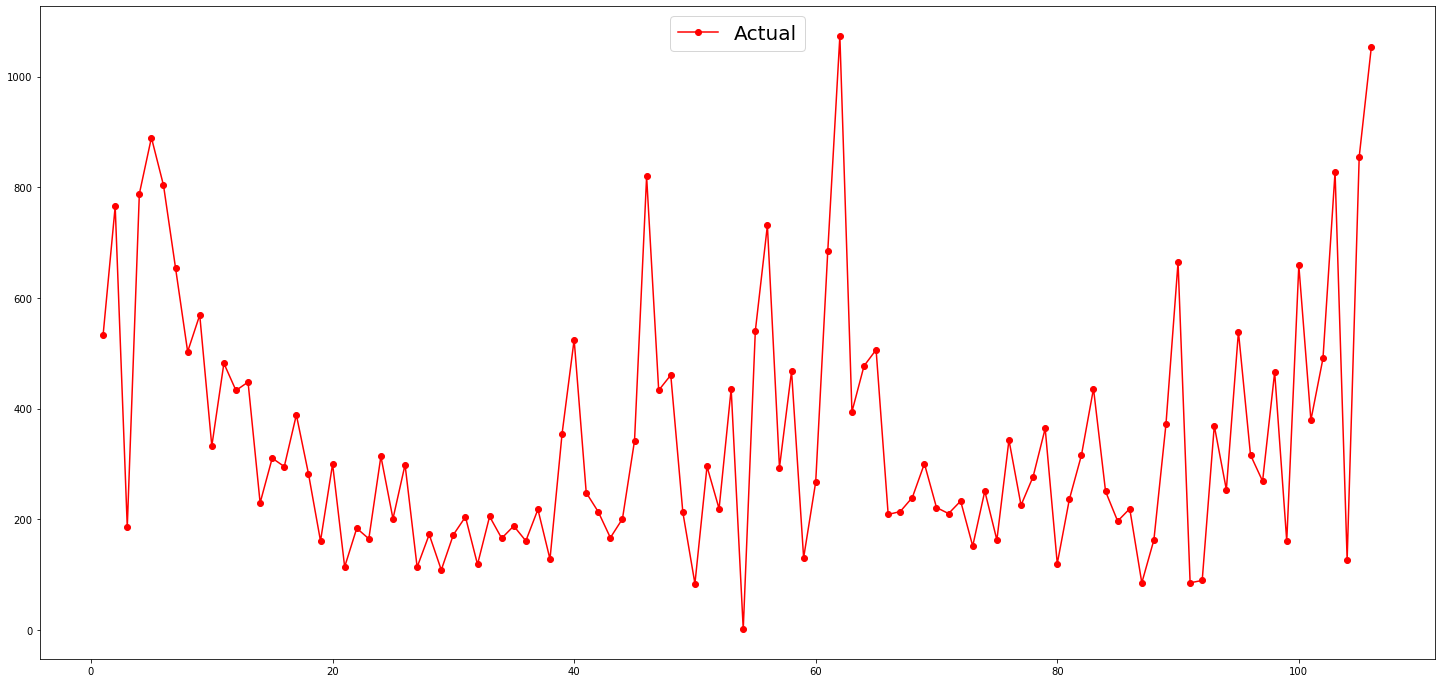

In [27]:
plt.figure(figsize=(25,12))
plt.plot(P_pred.shift(periods=1), label='Actual', color="red", marker="o") # Red is actuals

plt.legend(loc=9, prop={'size': 20})
plt.show()

In [28]:
P_pred[:-5]

0       533.244186
1       765.413675
2       186.178341
3       788.250425
4       889.833263
5       803.759566
6       653.826500
7       502.999653
8       569.224040
9       332.434237
10      481.934911
11      432.917223
12      448.057679
13      229.720925
14      310.535846
15      295.384710
16      388.767756
17      282.741771
18      160.838522
19      299.871860
20      114.022217
21      183.855809
22      164.847689
23      313.865040
24      201.068197
25      298.770799
26      113.592428
27      172.599357
28      108.480198
29      172.115385
30      204.416530
31      118.509442
32      205.122441
33      165.784479
34      187.992830
35      160.988408
36      217.927922
37      128.039085
38      354.681583
39      524.676047
40      248.126037
41      213.423143
42      166.765105
43      200.901362
44      342.198633
45      819.695900
46      433.175166
47      460.710920
48      212.618715
49       83.727850
50      295.560766
51      219.098495
52      435.

### Ws_avg - Wind_speed (m/s); Average wind speed

In [29]:
# Convert negative Ws_avg to 1
windfarm.loc[(windfarm['Ws_avg'] < 0) | (windfarm['Ws_avg'].isnull()), 'Ws_avg'] = 1

In [30]:
windfarm_yw_ws = windfarm.groupby(['year','Week_Number']).mean().reset_index().Ws_avg

In [31]:
# Hold out 20% of the end data for testing
Ws_train, Ws_test = windfarm_yw_ws[:86], windfarm_yw_ws[-21:]

In [32]:
Ws_fit_es = ExponentialSmoothing(Ws_train, seasonal_periods=7, trend='add', seasonal='mul').fit(use_boxcox=True)
Ws_pred_es = Ws_fit_es.predict(start=Ws_test.index[0], end=Ws_test.index[-1])

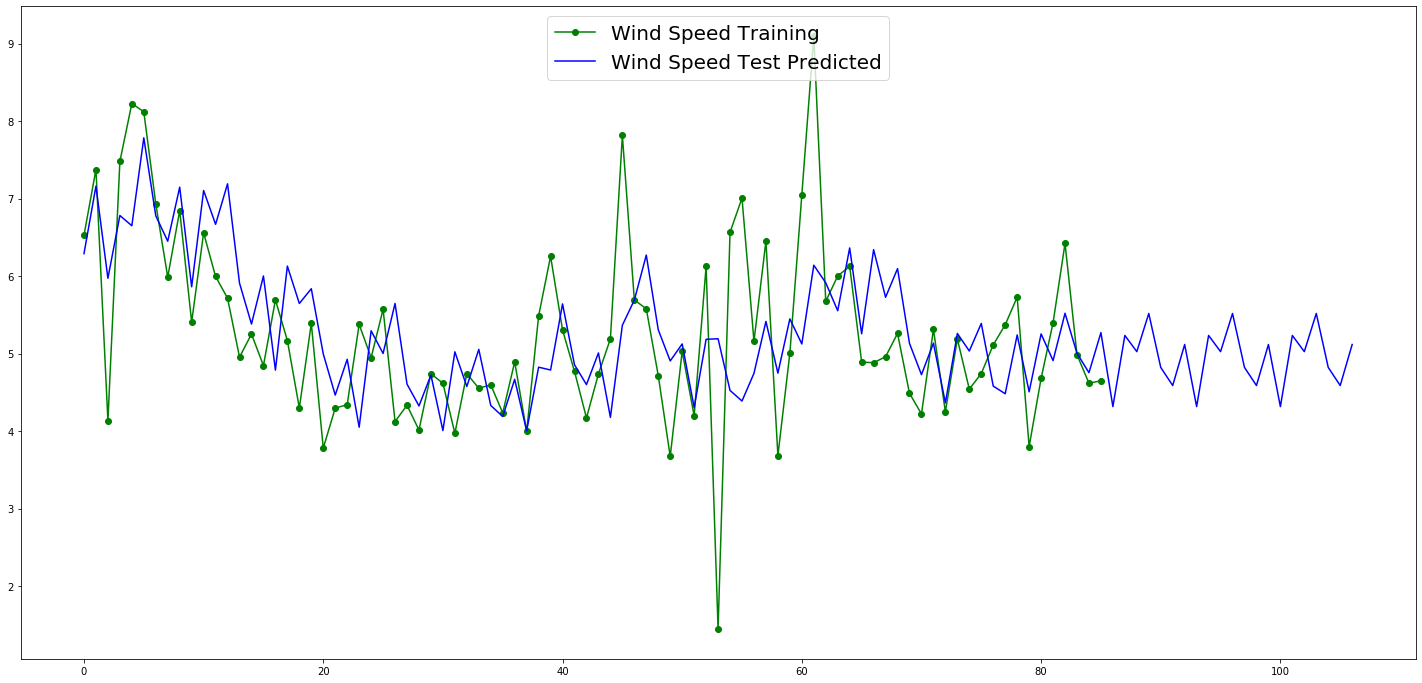

In [33]:
plt.figure(figsize=(25,12))

plt.plot(Ws_train.index, Ws_train, label='Wind Speed Training', color="green", marker="o")
# plt.plot(pred_es.index, pred_es, label='Test', color='blue')
plt.plot(pd.concat([Ws_fit_es.fittedvalues, Ws_pred_es]), label='Wind Speed Test Predicted', color='blue') # Blue is predicted

# plt.plot(pred_es.index, pred_es, label='Holt-Winters', color='red')
plt.legend(loc=9, prop={'size': 20})
plt.show();

In [34]:
Ws_fit_es = ExponentialSmoothing(Ws_train, seasonal_periods=7, trend='mul', seasonal='mul').fit(use_boxcox=True)
Ws_pred_es = Ws_fit_es.predict(start=Ws_test.index[0], end=Ws_test.index[-1])

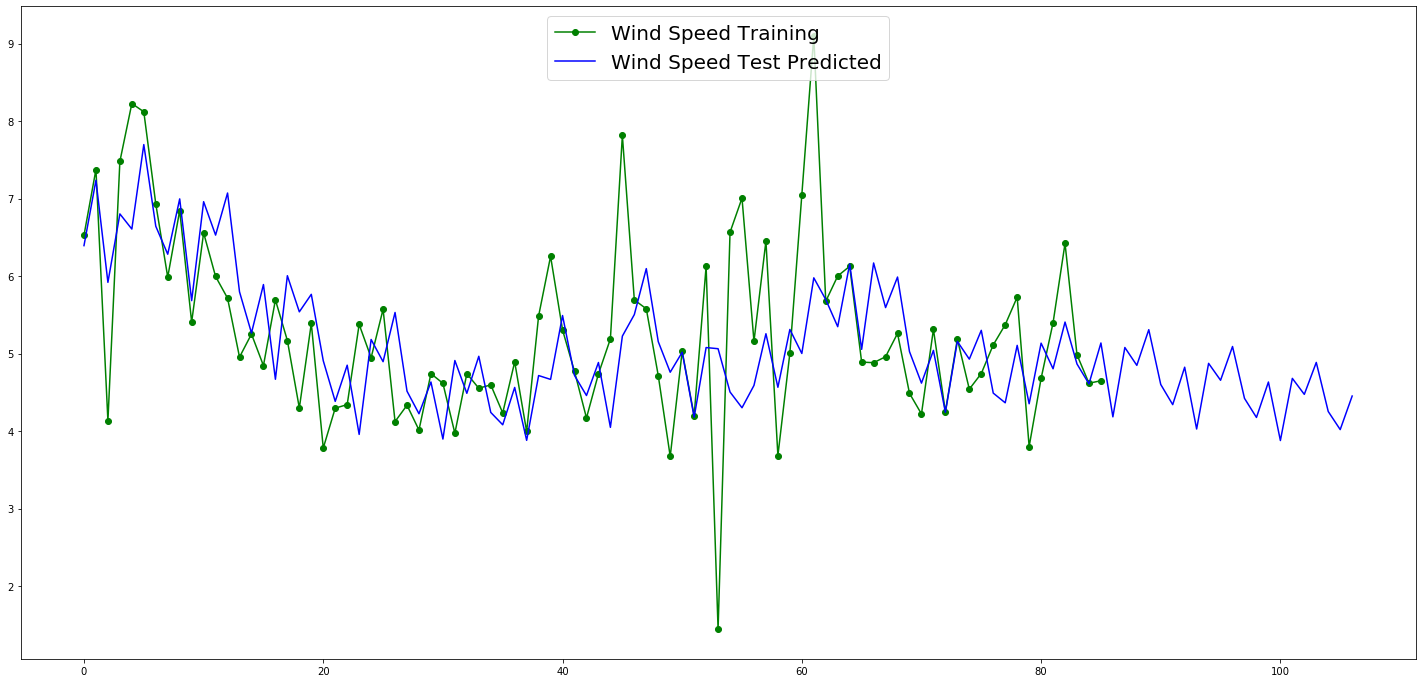

In [35]:
plt.figure(figsize=(25,12))

plt.plot(Ws_train.index, Ws_train, label='Wind Speed Training', color="green", marker="o")
# plt.plot(pred_es.index, pred_es, label='Test', color='blue')
plt.plot(pd.concat([Ws_fit_es.fittedvalues, Ws_pred_es]), label='Wind Speed Test Predicted', color='blue') # Blue is predicted

# plt.plot(pred_es.index, pred_es, label='Holt-Winters', color='red')
plt.legend(loc=9, prop={'size': 20})
plt.show();

In [36]:
Ws_fit_es = ExponentialSmoothing(Ws_train, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
Ws_pred_es = Ws_fit_es.predict(start=Ws_test.index[0], end=Ws_test.index[-1])

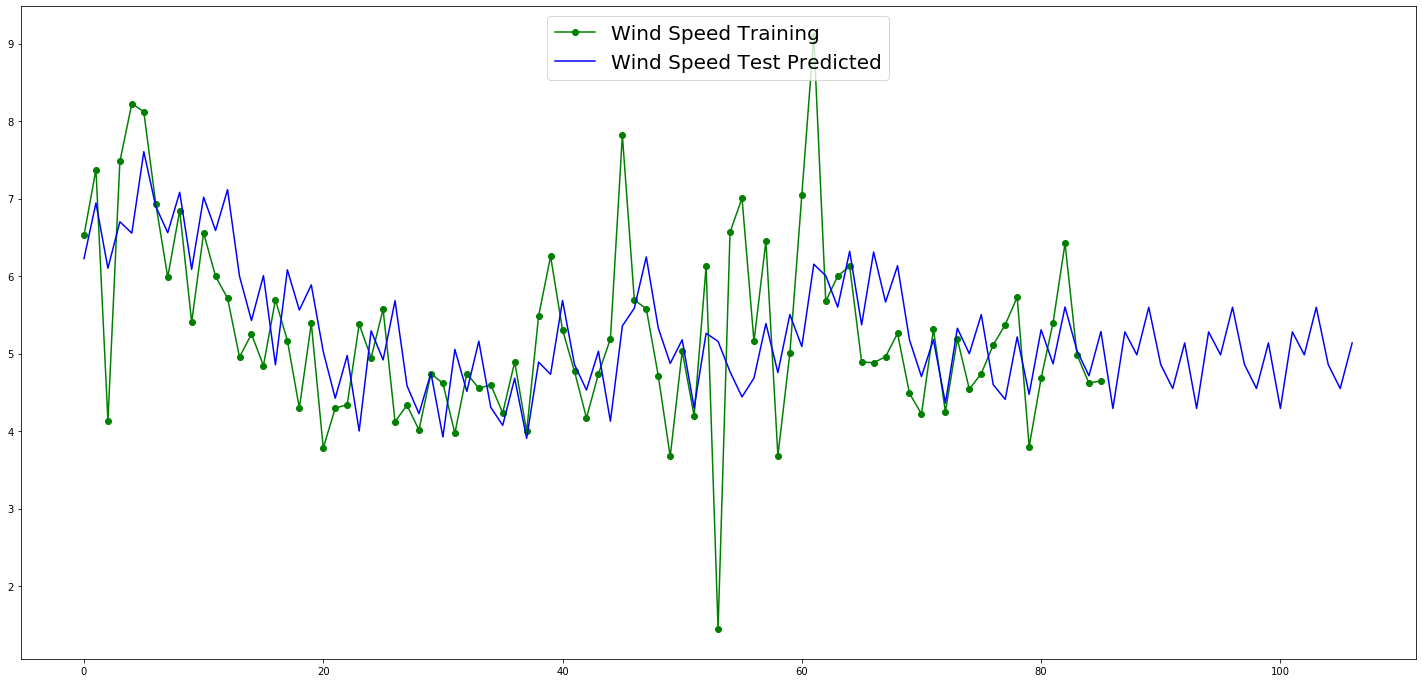

In [37]:
plt.figure(figsize=(25,12))

plt.plot(Ws_train.index, Ws_train, label='Wind Speed Training', color="green", marker="o")
# plt.plot(pred_es.index, pred_es, label='Test', color='blue')
plt.plot(pd.concat([Ws_fit_es.fittedvalues, Ws_pred_es]), label='Wind Speed Test Predicted', color='blue') # Blue is predicted

# plt.plot(pred_es.index, pred_es, label='Holt-Winters', color='red')
plt.legend(loc=9, prop={'size': 20})
plt.show();

In [38]:
Ws_fit_es = ExponentialSmoothing(Ws_train, seasonal_periods=7, trend='mul', seasonal='add').fit(use_boxcox=True)
Ws_pred_es = Ws_fit_es.predict(start=Ws_test.index[0], end=Ws_test.index[-1])

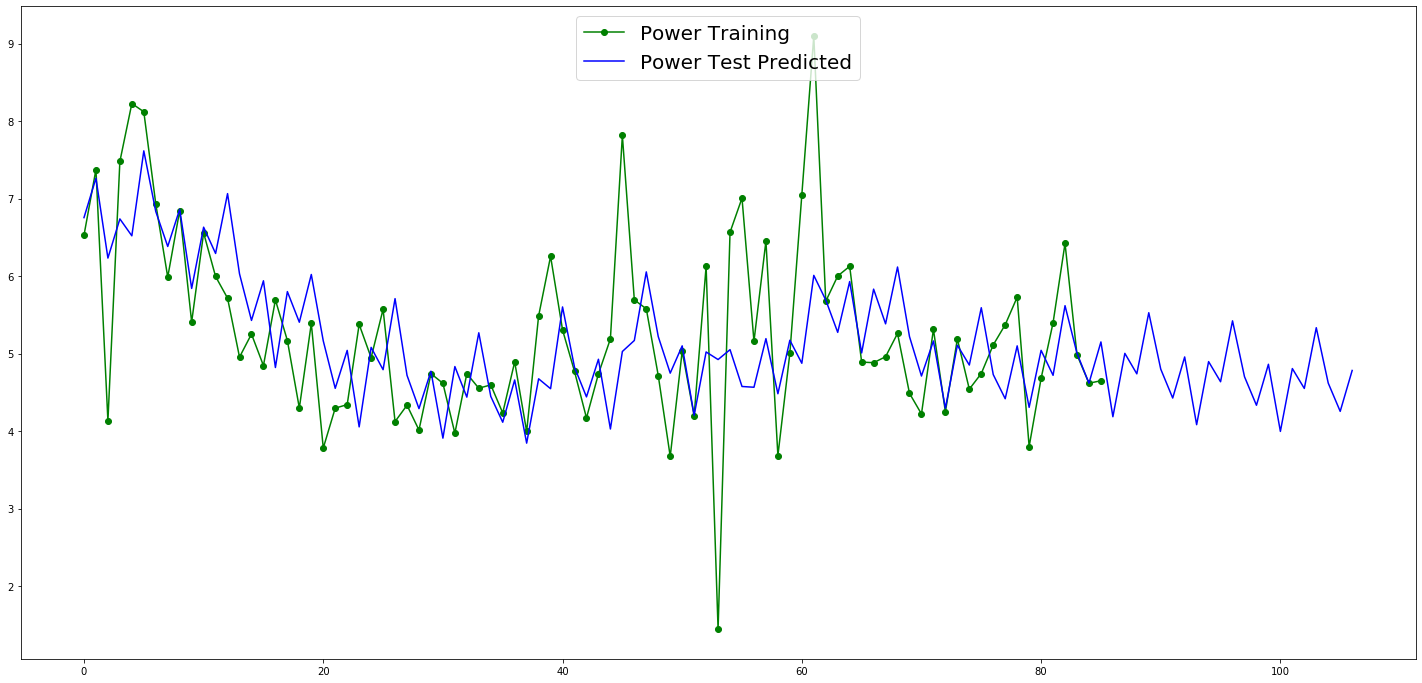

In [39]:
plt.figure(figsize=(25,12))

plt.plot(Ws_train.index, Ws_train, label='Power Training', color="green", marker="o")
# plt.plot(pred_es.index, pred_es, label='Test', color='blue')
plt.plot(pd.concat([Ws_fit_es.fittedvalues, Ws_pred_es]), label='Power Test Predicted', color='blue') # Blue is predicted

# plt.plot(pred_es.index, pred_es, label='Holt-Winters', color='red')
plt.legend(loc=9, prop={'size': 20})
plt.show();

In [40]:
Ws_pred = windfarm.groupby(['year','Week_Number']).mean().reset_index().Ws_avg

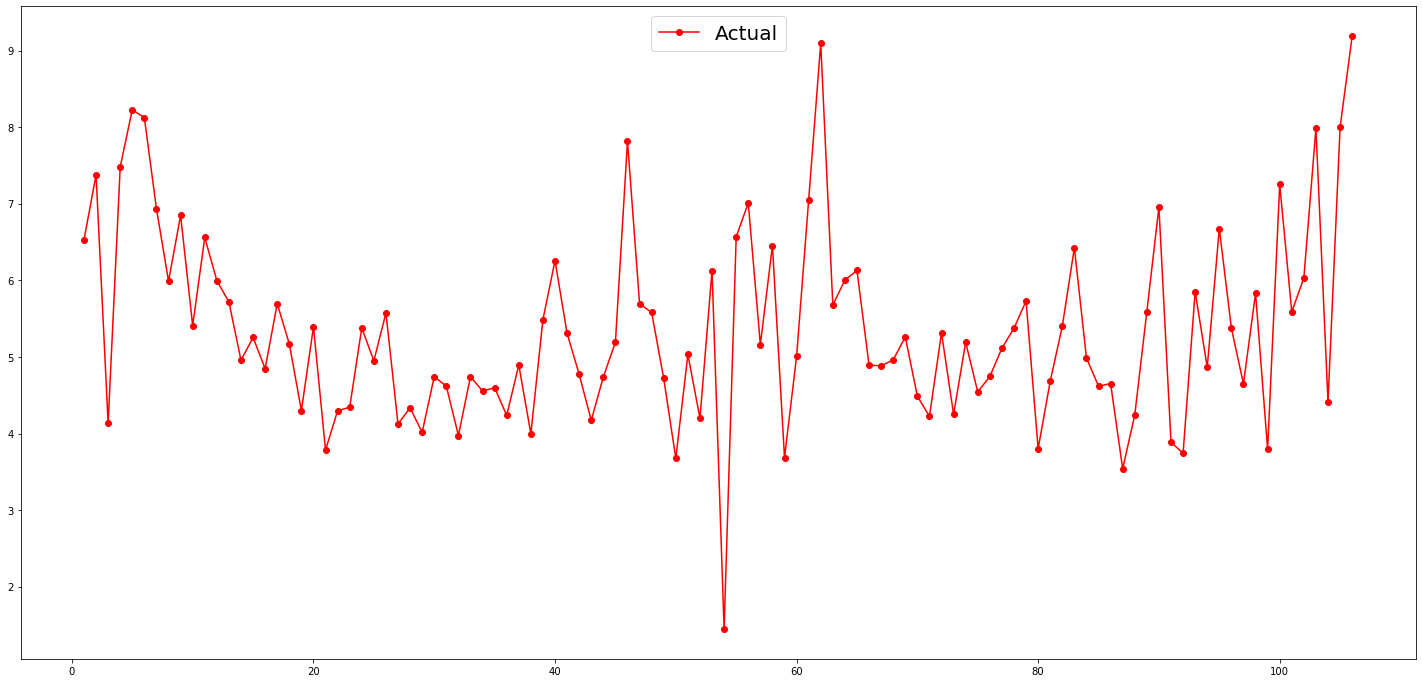

In [41]:
plt.figure(figsize=(25,12))
plt.plot(Ws_pred.shift(periods=1), label='Actual', color="red", marker="o") # Red is actuals

plt.legend(loc=9, prop={'size': 20})
plt.show()

### Holt-Winters Parameters

- **smoothing_level** - float, optional: *.8 - 1.1 are ok*

The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.

- **smoothing_slope** - float, optional: *leave as .1 - .5*

The beta value of the Holt’s trend method, if the value is set then this value will be used as the value.

- **damping_slope** - float, optional: *No effect*

The phi value of the damped method, if the value is set then this value will be used as the value.

- **optimized** - bool, optional: *Keep as False*

Estimate model parameters by maximizing the log-likelihood

In [42]:
Pfit1 = Holt(P_pred[:-5]).fit(smoothing_level=.8, smoothing_slope=.2, optimized=True)
Pfcast1 = Pfit1.forecast(5)

In [43]:
# P_pred.shift(periods=1)

In [44]:
# Pfcast1

In [45]:
# Pfit1.fittedvalues

In [46]:
# type(Pfit1.fittedvalues)

In [47]:
# type(Pfcast1)

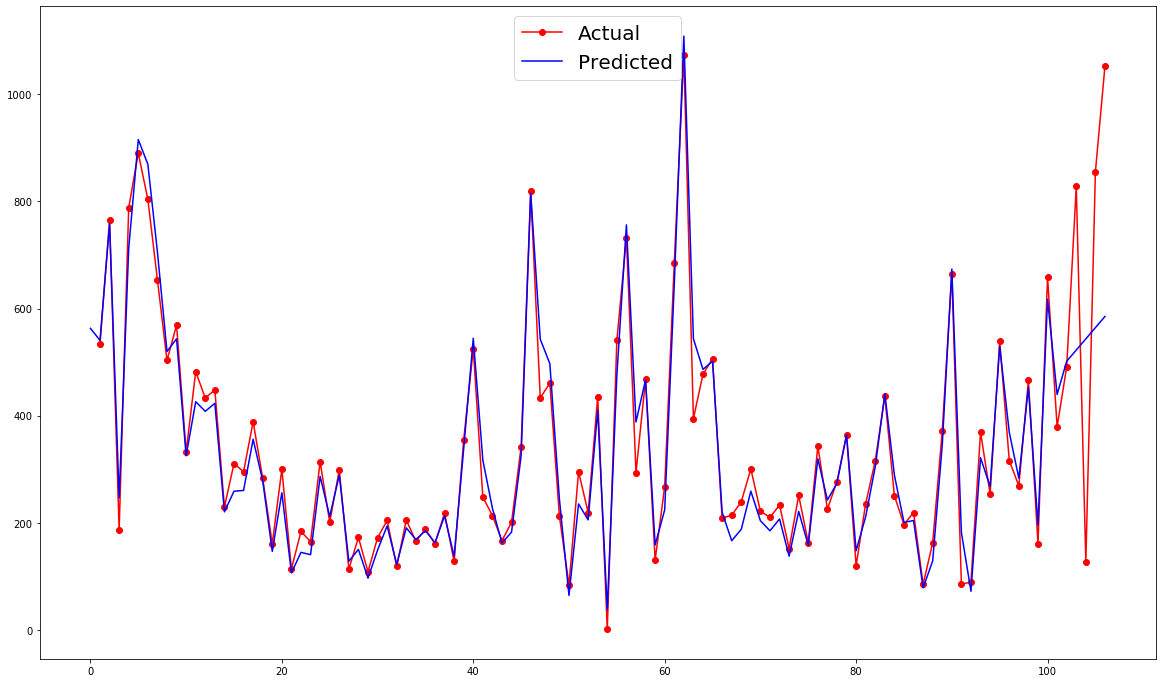

In [60]:
plt.figure(figsize=(20,12))
plt.plot(P_pred.shift(periods=1), label='Actual', color="red", marker="o") # Red is actuals
plt.plot(pd.concat([Pfit1.fittedvalues, Pfcast1]), label='Predicted', color='blue') # Blue is predicted
# plt.plot(Pfcast1)
plt.legend(loc=9, prop={'size': 20})
plt.show()

### Wind Speed:

In [49]:
Ws_pred = windfarm.groupby(['year','Week_Number']).mean().reset_index().Ws_avg

In [50]:
Ws_fit1 = Holt(Ws_pred[:-5]).fit(smoothing_level=.8, smoothing_slope=.2, optimized=True)
Ws_fcast1 = Ws_fit1.forecast(5)

In [51]:
# Ws_pred.shift(periods=1)

In [52]:
# Ws_fcast1

In [53]:
# Ws_fit1.fittedvalues

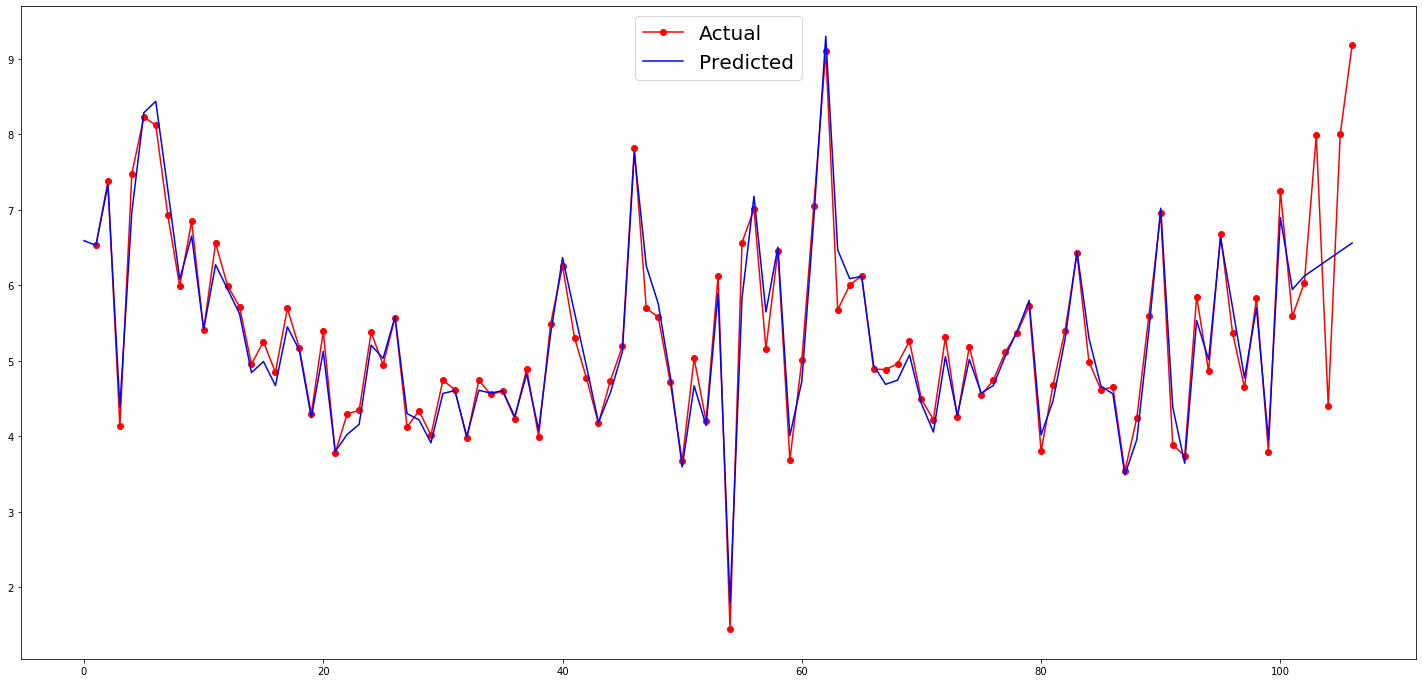

In [54]:
plt.figure(figsize=(25,12))
plt.plot(Ws_pred.shift(periods=1), label='Actual', color="red", marker="o") # Red is actuals
plt.plot(pd.concat([Ws_fit1.fittedvalues, Ws_fcast1]), label='Predicted', color='blue') # Blue is predicted
# plt.plot(fcast1)
plt.legend(loc=9, prop={'size': 20})
plt.show()

smoothing_level - float, optional: .8 - 1.1 are ok
The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.

smoothing_slope - float, optional: leave as .1 - .5
The beta value of the Holt’s trend method, if the value is set then this value will be used as the value.

damping_slope - float, optional: No effect
The phi value of the damped method, if the value is set then this value will be used as the value.

In [55]:
Ws_fit1 = Holt(Ws_pred[:-5]).fit(smoothing_level=.8, smoothing_slope=.4, optimized=True)
# Ws_fit1 = Holt(Ws_pred[:-5]).fit(smoothing_level=.8, smoothing_slope=.9, optimized=False)
Ws_fcast1 = Ws_fit1.forecast(5)

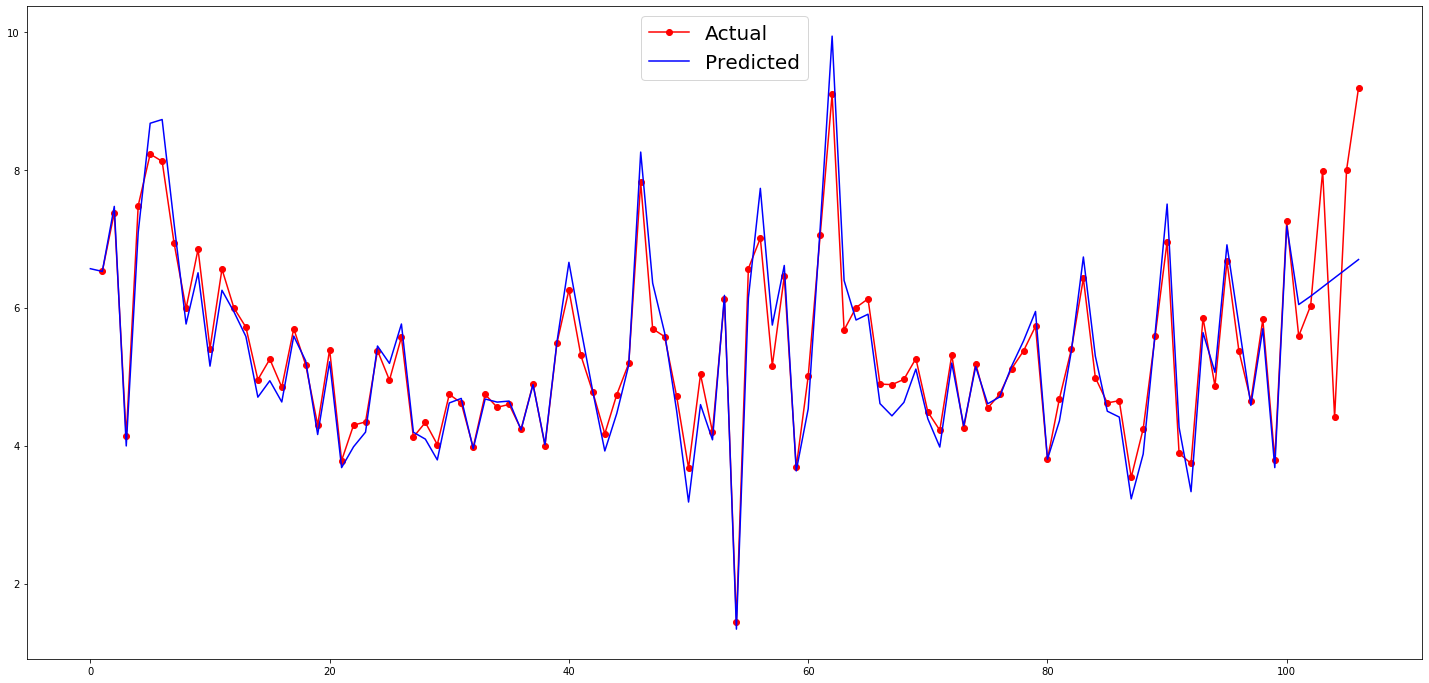

In [56]:
plt.figure(figsize=(25,12))
plt.plot(Ws_pred.shift(periods=1), label='Actual', color="red", marker="o") # Red is actuals
plt.plot(pd.concat([Ws_fit1.fittedvalues, Ws_fcast1]), label='Predicted', color='blue') # Blue is predicted
# plt.plot(Ws_fcast1)
plt.legend(loc=9, prop={'size': 20})
plt.show()

### Wind Direction Corrected
- Wa - Absolut_wind_direction (degrees)

In [57]:
Wa_pred = windfarm.groupby(['year','Week_Number']).mean().reset_index().Wa_avg

In [58]:
Wa_fit1 = Holt(Wa_pred[:-5]).fit(smoothing_level=.8, smoothing_slope=.4, optimized=True)
Wa_fcast1 = Wa_fit1.forecast(5)

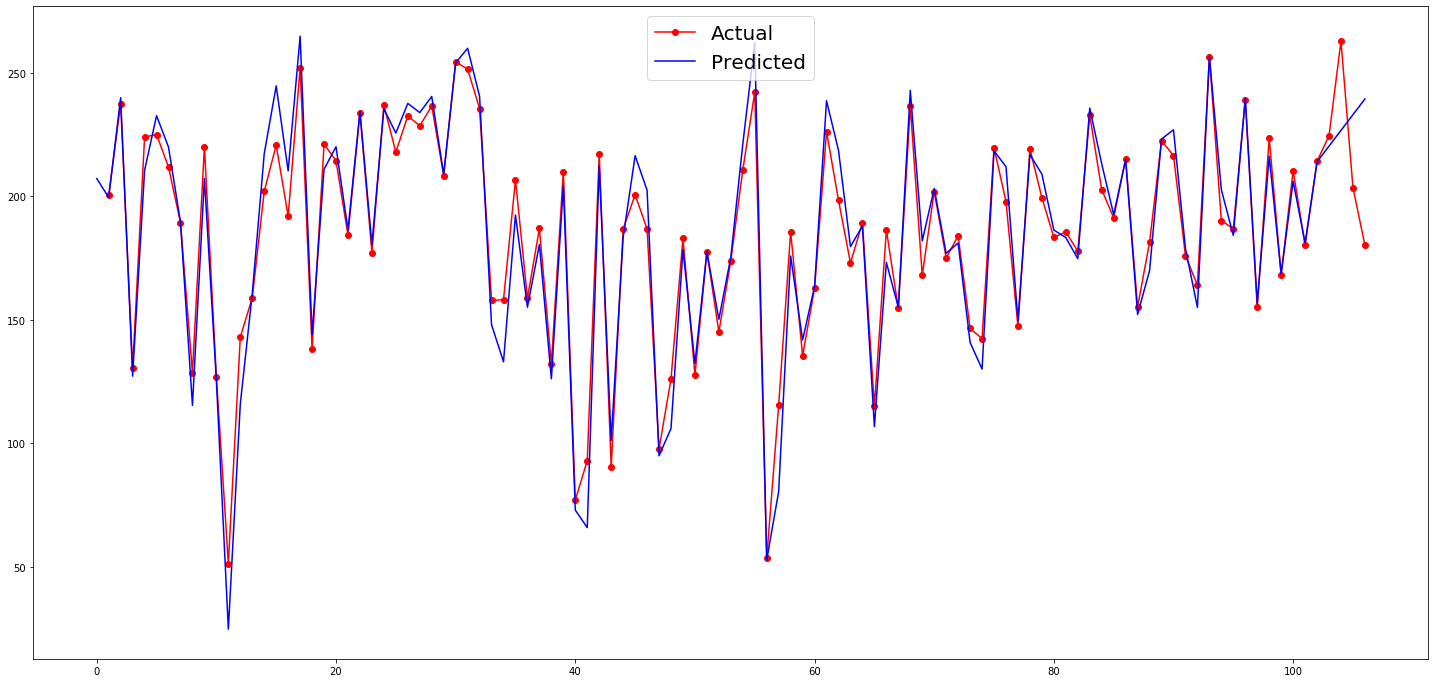

In [59]:
plt.figure(figsize=(25,12))
plt.plot(Wa_pred.shift(periods=1), label='Actual', color="red", marker="o") # Red is actuals
plt.plot(pd.concat([Wa_fit1.fittedvalues, Wa_fcast1]), label='Predicted', color='blue') # Blue is predicted

plt.legend(loc=9, prop={'size': 20})
plt.show()